In [1]:
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from yaml import safe_load
import glob
import json
import numpy as np
from moltraffic.models.models import * 

files = glob.glob('../models/test_metrics/*/subset*.yaml')

from collections import defaultdict
models = defaultdict(lambda: [])

for fn in files:
    with open(fn, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        mae = df['MAE'].to_list()[0]
        model_name = df['model_name'].to_list()[0]
        models[model_name].append(mae)
        
        
merged = [
    ['PytorchShallowRegressorModel', 'PytorchRegressorModel', 'PytorchDeepRegressorModel', 'PytorchDeepDeepRegressorModel', 'PytorchDeepDeepDeepRegressorModel'],
    ['PytorchWideShallowRegressorModel', 'PytorchWideRegressorModel', 'PytorchWideDeepRegressorModel', 'PytorchWideDeepDeepRegressorModel', 'PytorchWideDeepDeepDeepRegressorModel'],
    ['PytorchWideWideShallowRegressorModel', 'PytorchWideWideRegressorModel', 'PytorchWideWideDeepRegressorModel', 'PytorchWideWideDeepDeepRegressorModel', 'PytorchWideWideDeepDeepDeepRegressorModel'],
    
    #['PytorchShallowEnsembleRegressorModel', 'PytorchEnsembleRegressorModel', 'PytorchDeepEnsembleRegressorModel', 'PytorchDeepDeepEnsembleRegressorModel', 'PytorchDeepDeepDeepEnsembleRegressorModel'],
    #['PytorchWideShallowEnsembleRegressorModel', 'PytorchWideEnsembleRegressorModel', 'PytorchWideDeepEnsembleRegressorModel', 'PytorchWideDeepDeepEnsembleRegressorModel', 'PytorchWideDeepDeepDeepEnsembleRegressorModel'],
    #['PytorchWideWideShallowEnsembleRegressorModel', 'PytorchWideWideEnsembleRegressorModel', 'PytorchWideWideDeepEnsembleRegressorModel', 'PytorchWideWideDeepDeepEnsembleRegressorModel', 'PytorchWideWideDeepDeepDeepEnsembleRegressorModel'],
    
    ['PytorchShallowEnsemble10RegressorModel', 'PytorchEnsemble10RegressorModel', 'PytorchDeepEnsemble10RegressorModel', 'PytorchDeepDeepEnsemble10RegressorModel', 'PytorchDeepDeepDeepEnsemble10RegressorModel'],
    ['PytorchWideShallowEnsemble10RegressorModel', 'PytorchWideEnsemble10RegressorModel', 'PytorchWideDeepEnsemble10RegressorModel', 'PytorchWideDeepDeepEnsemble10RegressorModel', 'PytorchWideDeepDeepDeepEnsemble10RegressorModel'],
    ['PytorchWideWideShallowEnsemble10RegressorModel', 'PytorchWideWideEnsemble10RegressorModel', 'PytorchWideWideDeepEnsemble10RegressorModel', 'PytorchWideWideDeepDeepEnsemble10RegressorModel', 'PytorchWideWideDeepDeepDeepEnsemble10RegressorModel'],
]
        
        
plot_vals = dict()
#df = pd.DataFrame()

#df_list = []

def flatten(t):
    return [item for sublist in t for item in sublist]


for k in flatten(merged):
    data_dict = {**import_from_class_name(f'moltraffic.models.models.{k}')().pytorch_model_arguments, 'error': np.median(models[k]), 'ensemble': 'Ensemble' in k}
    plot_vals[k] = data_dict
    
    #df_list.append({**data_dict, 'ensemble': 'Ensemble' in k, 'model_name': k})

In [2]:
#df = pd.DataFrame(df_list)

In [3]:
#for k, v in models.items():
#    print(k, len(v))

In [4]:
#plot_vals

In [5]:
#df.query('')

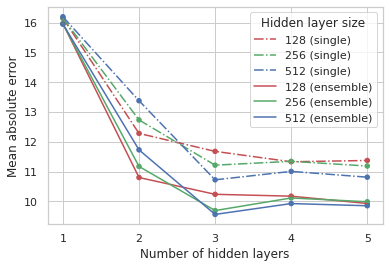

In [7]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(15, 7))

from matplotlib.ticker import MaxNLocator

linestyles = 3 * ['-.'] + 3 * ['-']
linescolors = 3*['r', 'g', 'b'] + 3*['r', 'g', 'b']


ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#labels = ['128', '256', '512', '128', '256', '512']

for l, ls, lc in zip(merged, linestyles, linescolors):
    v1, v2 = [plot_vals[x]['number_of_hidden_layers'] for x in l], [plot_vals[x]['error'] for x in l]
    plt.scatter(v1, v2, s=len(v1)*[20], c=len(v1)*[lc])
    

    hidden_size = int(np.mean([plot_vals[x]['hidden_layer_size'] for x in l]))
    #print(l[0])
    is_ensamble = "(ensemble)" if "Ensemble" in l[0] else "(single)"
    
    plt.plot(v1, v2, linestyle=ls, c=lc, label=f'{hidden_size} {is_ensamble}')

#from matplotlib.lines import Line2D

#colors = ['black', 'red', 'green']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
#labels = ['black data', 'red data', 'green data']
#plt.legend(lines, labels)
#plt.show()
    
    
plt.legend(title="Hidden layer size")
plt.ylabel('Mean absolute error')
plt.xlabel('Number of hidden layers')
plt.savefig('nnet_hyperparameters.pdf', bbox_inches='tight', pad_inches=0)